## Import Packages

In [85]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Problem Understanding

The Vehicle Safety Board of Chicago has determine that it is necessary to know and understand the primary contributory cause of a car accident. Therefore, it will be possible to recognise patterns and consequently "it could create guidelines to implement preventive actions."
Based on the data, we are going to predict if the cause of a car accident if influence by the weather, location, time or by the number of passengers.
From the created models, we want to estimate the global/generic/general/average cost of having a injury person or the cost a average crash.


Predict the frequency of traffic accidents between the road geometric variables, traffic characteristics, and environmental factors.


# Data Understanding



In [2]:
# Crashes Dataset
crash = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
# crash.info()

In [3]:
# People Dataset
people = pd.read_csv('Traffic_Crashes_-_People.csv')
# people.head()

/Users/nd/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Vehicles Dataset
vehicles = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
# crashes.head()

/Users/nd/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,55,58,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Selecting Features

In [5]:
# Selecting specific features on crashes dataset
crashes = crash[['CRASH_RECORD_ID', 'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 
                 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'ROADWAY_SURFACE_COND',
                 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
                 'BEAT_OF_OCCURRENCE','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]

In [6]:
# Selecting features on people's dataset
peoples = people[['CRASH_RECORD_ID','PERSON_TYPE', 'SEX', 'AGE']]

In [7]:
# Selecting features on vehicle's dataset
vehicle = vehicles[['CRASH_RECORD_ID', 'VEHICLE_TYPE', 'MANEUVER']]

## Combining Datasets

In [8]:
#  Merging crashes with people datastes
df_cp = pd.merge(crashes, peoples, on = 'CRASH_RECORD_ID', how = 'left')

In [9]:
# Merging df_cp with vehicles dataset
df_x = pd.merge(df_cp, vehicle, on = 'CRASH_RECORD_ID', how = 'left')

In [10]:
# Selecting only class Driver
df_t = df_x[(df_x.PERSON_TYPE == 'DRIVER') & (df_x.AGE >=16) & (df_x.AGE <= 100)]
# df_t.isnull().sum()

In [11]:
dfq = df_t.drop_duplicates(subset = 'CRASH_RECORD_ID', keep='first')
dfq.isnull().sum()

CRASH_RECORD_ID               0
POSTED_SPEED_LIMIT            0
WEATHER_CONDITION             0
LIGHTING_CONDITION            0
FIRST_CRASH_TYPE              0
ROADWAY_SURFACE_COND          0
ROAD_DEFECT                   0
PRIM_CONTRIBUTORY_CAUSE       0
SEC_CONTRIBUTORY_CAUSE        0
BEAT_OF_OCCURRENCE            4
CRASH_HOUR                    0
CRASH_DAY_OF_WEEK             0
CRASH_MONTH                   0
PERSON_TYPE                   0
SEX                           0
AGE                           0
VEHICLE_TYPE               2711
MANEUVER                   2711
dtype: int64

In [12]:
# Dropping all nun values
df = dfq.dropna()
df.reset_index(inplace=True)

In [13]:
# Dropping all nun values
df = dfq.dropna()
df.reset_index(inplace=True)

## Data Analysis

In [14]:
# Geographic distribution of the crashes
from sodapy import Socrata
from shapely.geometry import shape

end_point = 'data.cityofchicago.org'
app_token = 'IaMIsAtmEfVIRb6i2lfqYvVmz'
max_rows = 300000

client = Socrata(end_point, app_token)
chi_map = client.get("85ca-t3if", limit=max_rows)
chi_map = pd.DataFrame(chi_map)

In [142]:
# Converting Latitude and Longitude as float
chi_map['latitude'] = chi_map['latitude'].astype(float)
chi_map['longitude'] = chi_map['longitude'].astype(float)
chi_map = chi_map[np.abs(chi_map['latitude'] - chi_map['latitude'].mean()) <= (10 * chi_map['latitude'].std())]
chi_map = chi_map[np.abs(chi_map['longitude'] - chi_map['longitude'].mean()) <= (10 * chi_map['longitude'].std())]

In [143]:
import geopandas as gpd
chi_map['location'] = chi_map['location'].apply(shape)
crs = {'init': 'epsg:4326'} 
chi_map = gpd.GeoDataFrame(chi_map, geometry='location', crs=crs)

chi_map.shape

(298217, 49)

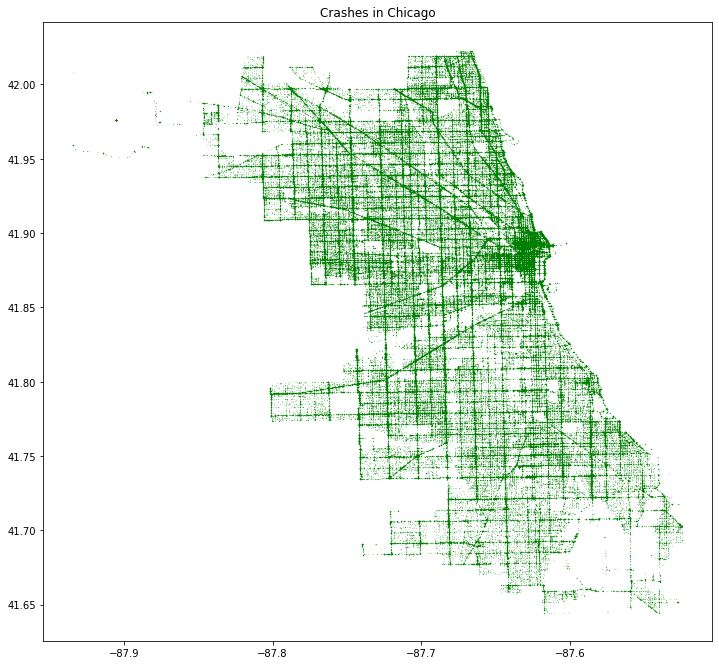

In [144]:
chi_map.plot(markersize=0.01, color='green', figsize=(12,12))
plt.axis('on')
plt.title('Crashes Geographically Distributed - Chicago')
plt.show()

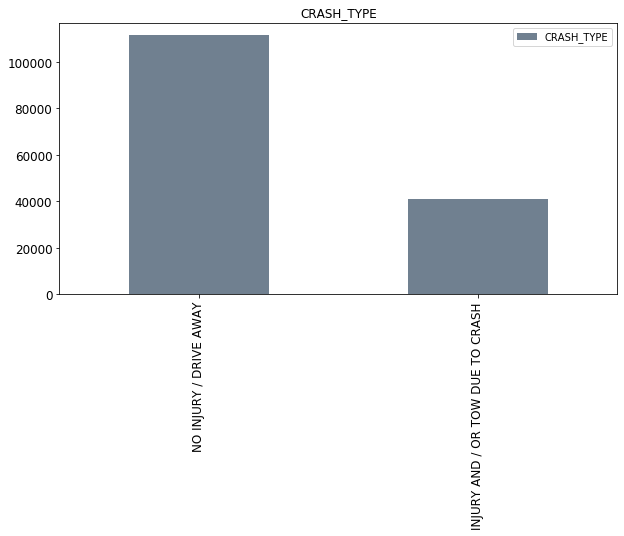

In [148]:

crash['CRASH_TYPE'].value_counts().plot(kind='bar', 
                                        title ="CRASH_TYPE",
                                        figsize=(10, 5),
                                        legend=True, 
                                        fontsize=12,
                                        color='slategrey')
plt.show()

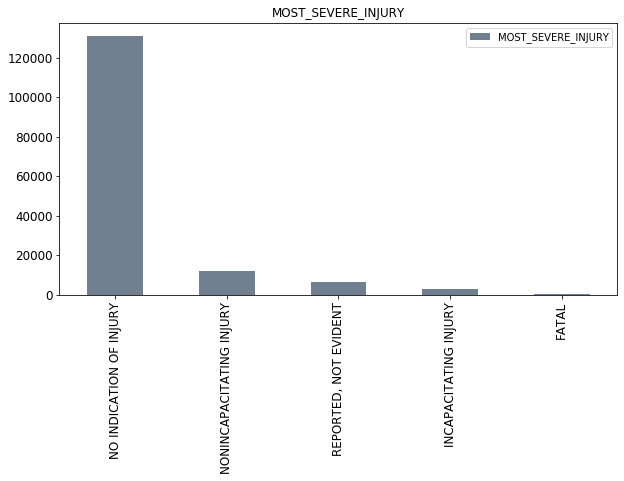

In [178]:

crash['MOST_SEVERE_INJURY'].value_counts().plot(kind='bar',
                                                title ="MOST_SEVERE_INJURY", 
                                                figsize=(10, 5), 
                                                legend=True,
                                                fontsize=12,
                                                color='slategrey')
plt.show()

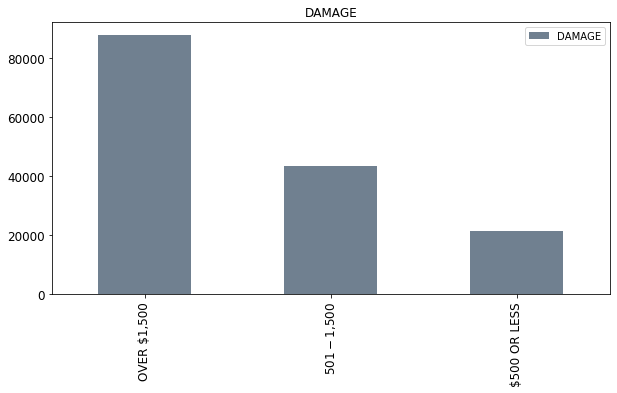

In [177]:

crash['DAMAGE'].value_counts().plot(kind='bar', 
                                    title ="DAMAGE", 
                                    figsize=(10, 5),
                                    legend=True,
                                    fontsize=12,
                                    color='slategrey')
plt.show()

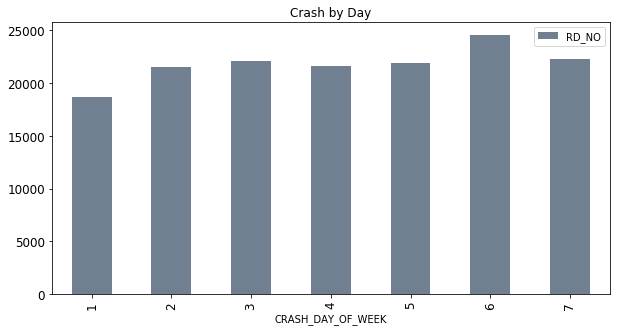

In [179]:
crash.groupby(['CRASH_DAY_OF_WEEK']).count()['RD_NO'].plot(kind='bar',
                                                           title ="CRASH BY DAY", 
                                                           figsize=(10, 5),
                                                           legend=True,
                                                           fontsize=12,
                                                           color='slategrey')
plt.show()

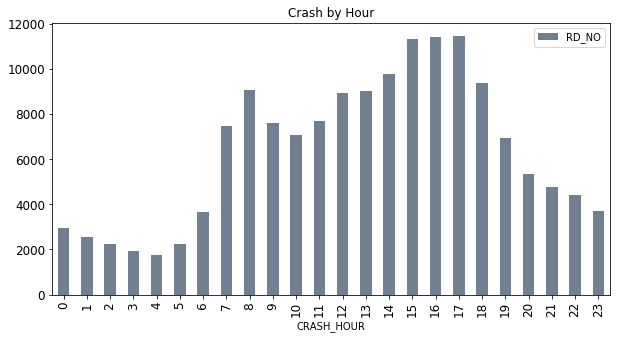

In [180]:
crash.groupby(['CRASH_HOUR']).count()['RD_NO'].plot(kind='bar',
                                                    title ="CRASH BY HOUR",
                                                    figsize=(10, 5), 
                                                    legend=True, 
                                                    fontsize=12,
                                                    color='slategrey')
plt.show()

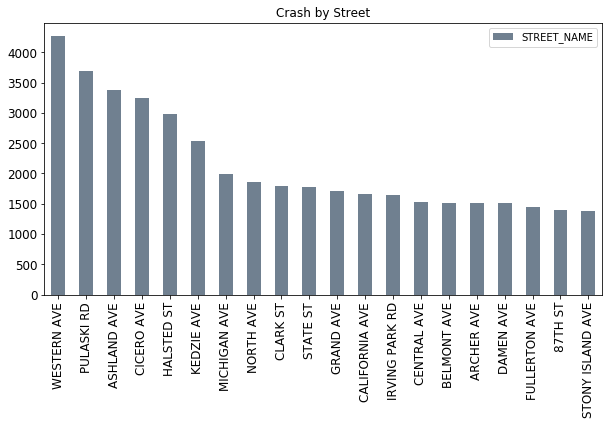

In [181]:
crash['STREET_NAME'].value_counts()[:min(20, len(crash))].plot(kind='bar',
                                                               title ="CRASH BY STREET", 
                                                               figsize=(10, 5),
                                                               legend=True,
                                                               fontsize=12,
                                                               color='slategrey')
plt.show()

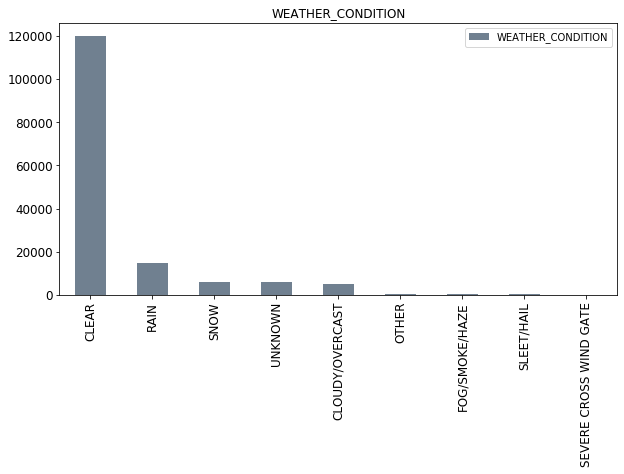

In [182]:

crash['WEATHER_CONDITION'].value_counts().plot(kind='bar',
                                               title ="WEATHER_CONDITION",
                                               figsize=(10, 5),
                                               legend=True,
                                               fontsize=12,
                                               color='slategrey')
plt.show()

# Data Preparation

In [15]:
# Creating dummy variables 
x_feats = ['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
           'ROADWAY_SURFACE_COND','ROAD_DEFECT','VEHICLE_TYPE', 'MANEUVER',
           'SEX', 'SEC_CONTRIBUTORY_CAUSE','PERSON_TYPE']
    
tre = pd.get_dummies(df[x_feats], drop_first=True, dtype=float)
tre

,WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,...,SEC_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,SEC_CONTRIBUTORY_CAUSE_RELATED TO BUS STOP,SEC_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE,SEC_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,SEC_CONTRIBUTORY_CAUSE_TEXTING,SEC_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",SEC_CONTRIBUTORY_CAUSE_WEATHER
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317352,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
317354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317355,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y_dummy = ['PRIM_CONTRIBUTORY_CAUSE']
y_dum = pd.get_dummies(df[y_dummy], drop_first=True, dtype=float)

In [17]:
y_dum['PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY'].value_counts()

0.0    275239
1.0     42118
Name: PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY, dtype: int64

In [18]:
qw = df[['BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK']]

### Split your X data in train and test datasets¶


In [19]:
X = pd.concat([qw, tre], axis=1)
y = y_dum['PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY']

In [20]:
# Split X data in train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train data in train and validation datasets
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(len(X_train_s), len(X_val), len(y_train_s), len(y_val))

203108 50777 203108 50777


In [21]:
print('X_train_s:', X_train_s.shape)
print('y_train_s:', y_train_s.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train_s: (203108, 137)
y_train_s: (203108,)
X_val: (50777, 137)
y_val: (50777,)
X_test: (63472, 137)
y_test: (63472,)


### Scale the 3 datasets using StandardScaler¶


In [22]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train_s)

X_train_scaled = scaler.transform(X_train_s)
X_val_scaled = scaler.transform(X_val) 
X_test = scaler.transform(X_test)

# Model Evaluation

### Baseline Model

In [28]:
# Instantiate and fit a DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) 
tree_clf.fit(X_train_scaled,y_train_s)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [55]:
tr_p_t = tree_clf.predict_proba(X_train_scaled)[:,1]
tr_pr_v = tree_clf.predict_proba(X_val_scaled)[:,1]

In [57]:
print("ROC AUC for the train dataset is", round(roc_auc_score(y_train_s, tr_p_t), 4))
print("ROC AUC for the validation dataset is", round(roc_auc_score(y_val, tr_pr_v), 4))

ROC AUC for the train dataset is 0.8961
ROC AUC for the validation dataset is 0.8974


## Bagging Classifier

In [31]:
from sklearn.ensemble import BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20, random_state=42)
bagged_tree.fit(X_train_scaled, y_train_s)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [58]:
bag_predi_t = bagged_tree.predict_proba(X_train_scaled)[:,1]
bag_predi_v = bagged_tree.predict_proba(X_val_scaled)[:,1]

In [59]:
print("ROC AUC for the train dataset is", round(roc_auc_score(y_train_s, bag_predi_t), 4))
print("ROC AUC for the validation dataset is", round(roc_auc_score(y_val, bag_predi_v), 4))

ROC AUC for the train dataset is 0.8986
ROC AUC for the validation dataset is 0.8999


### Hyperparameter Tuning

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=5, random_state=42)

param_grid = {'n_estimators' : [20,30],
              'bootstrap_features' : [True, False],
              'oob_score' : [True, False],
              }

opt_model = GridSearchCV(bagged_tree,
                         param_grid,
                         cv=skf,
                         scoring='accuracy',
                         return_train_score=True)

opt_model.fit(X_train_scaled, y_train_s)

print('The best hyperparameters are:',opt_model.best_params_)
print("Best score of the model is", round(opt_model.best_score_,4))

/Users/nd/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/nd/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: divide by zero encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/Users/nd/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/Users/nd/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/nd/opt/anaconda3/envs/learn-

The best hyperparameters are: {'bootstrap_features': True, 'n_estimators': 30, 'oob_score': True}
Accuracy of model is 0.8791


In [78]:
best_model = opt_model.best_estimator_
best_model

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=42)
rfc.fit(X_train_scaled,y_train_s)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [69]:
rfc_p_t = rfc.predict_proba(X_train_scaled)[:,1]
rfc_p_val = rfc.predict_proba(X_val_scaled)[:,1]

In [73]:
print("ROC AUC for the train dataset is", round(roc_auc_score(y_train_s, rfc_p_t), 4))
print("ROC AUC for the validation dataset is", round(roc_auc_score(y_val, rfc_p_val), 4))

ROC AUC for the train dataset is 1.0
ROC AUC for the validation dataset is 0.892


### Hyperparameter 

In [79]:
rfc_param_grid = {'max_depth':range(1,11,50),
                  'min_samples_leaf':[5,10,15]}

opt_rfc = GridSearchCV(rfc, 
                       rfc_param_grid,
                       cv=skf, 
                       scoring='accuracy',
                       n_jobs=-1)

opt_rfc.fit(X_train_scaled, y_train_s)

print('The best hyperparameters are:',opt_rfc.best_params_)
print("Best score of the model is", round(opt_rfc.best_score_,4))

The best hyperparameters are: {'max_depth': 1, 'min_samples_leaf': 5}
Best score of the model is 0.867


In [77]:
opt_rfc.fit(X_train_scaled, y_train_s)
print('Values of the optimised hyperparameters\nfor the best model found:',
      opt_rfc.best_params_)
round(opt_rfc.best_score_, 3)

Values of the optimised hyperparameters
for the best model found: {'max_depth': 1, 'min_samples_leaf': 5}


0.867

In [80]:
best_model = opt_rfc.best_estimator_
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

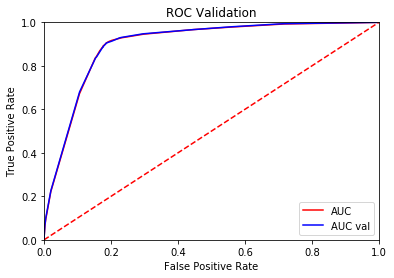

In [86]:
from sklearn.metrics import roc_curve
fpr_t,tpr_t,thr_t = roc_curve(y_train_s,bag_predi_t)
fpr_v,tpr_v,thr_v = roc_curve(y_val,bag_predi_v)

plt.title('ROC Validation')
plt.plot(fpr_t, tpr_t, 'red', label = 'AUC')
plt.plot(fpr_v, tpr_v, 'b', label = 'AUC val')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [103]:
CFP = 1500
TNC = 0
FNC = 47921
TPC = 20728
prevalence = 2.5
m = ((1 - prevalence) / prevalence ) * ((CFP - TNC) / (FNC - TPC))

print( f' m coefficient is {round(m,2)}')

 m coefficient is -0.03


In [104]:

fpr, tpr, threshold = metrics.roc_curve(y_train_s,bag_predi_t)
roc_auc = metrics.auc(fpr, tpr)

In [105]:
# finding TPR and FPR for threshold 0.4
thresh_40 = threshold[65]
fpr_40 = fpr[65]
tpr_40 = tpr[65]

fm_40 = tpr_40 - m*fpr_40

print(f' The fm for the .4 threshold is {round(fm_40,2)}')

# finding TPR and FPR for threshold 0.5
thresh_50 = threshold[46]
fpr_50 = fpr[46]
tpr_50 = tpr[46]

fm_50 = tpr_50 - m*fpr_50

print(f' The fm for the .5 threshold is {round(fm_50,2)}')

# finding TPR and FPR for threshold 0.6
thresh_60 = threshold[33]
fpr_60 = fpr[33]
tpr_60 = tpr[33]

fm_60 = tpr_60 - m*fpr_60

print(f' The fm for the .6 threshold is {round(fm_60,2)}')

# finding TPR and FPR for threshold 0.7
thresh_70 = threshold[25]
fpr_70 = fpr[25]
tpr_70 = tpr[25]

fm_70 = tpr_70 - m*fpr_70

print(f' The fm for the .7 threshold is {round(fm_70,2)}')

 The fm for the .4 threshold is 0.67
 The fm for the .5 threshold is 0.22
 The fm for the .6 threshold is 0.1
 The fm for the .7 threshold is 0.1


In [113]:

# creating the confusion matrix with sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_s, bag_predi_t)

ValueError: Classification metrics can't handle a mix of binary and continuous targets